In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set()

plt.rcParams['figure.figsize'] = (11, 8)

In [3]:
data = pd.read_csv('https://github.com/genzj/data-visualization-course/raw/master/data/bike-sharing-demand/train.csv', parse_dates=[0])
print(data.dtypes)
data.head()

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


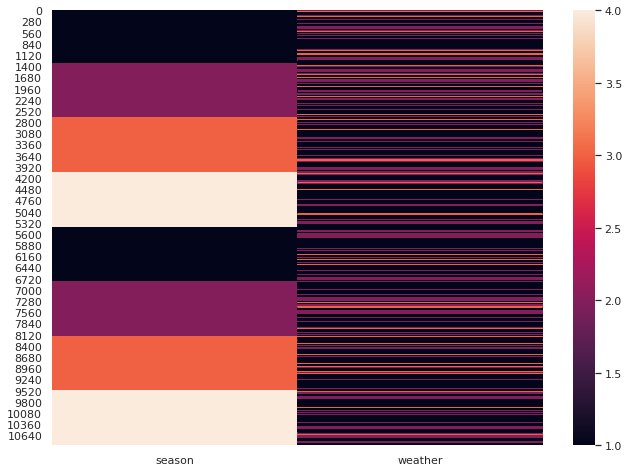

In [5]:
sns.heatmap(data[['season', 'weather']])

In [11]:
subframe = data.groupby(['season', 'weather'])['count'].sum()
subframe

season  weather
1       1          223009
        2           76406
        3           12919
        4             164
2       1          426350
        2          134177
        3           27755
3       1          470116
        2          139386
        3           31160
4       1          356588
        2          157191
        3           30255
Name: count, dtype: int64

In [12]:
subframe.unstack()

weather,1,2,3,4
season,,,,
1,223009.0,76406.0,12919.0,164.0
2,426350.0,134177.0,27755.0,NaN
3,470116.0,139386.0,31160.0,NaN
4,356588.0,157191.0,30255.0,NaN


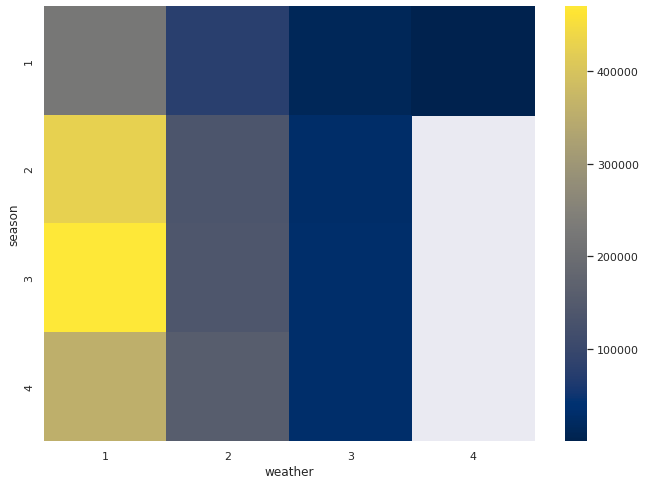

In [16]:
sns.heatmap(subframe.unstack(), cmap='cividis')

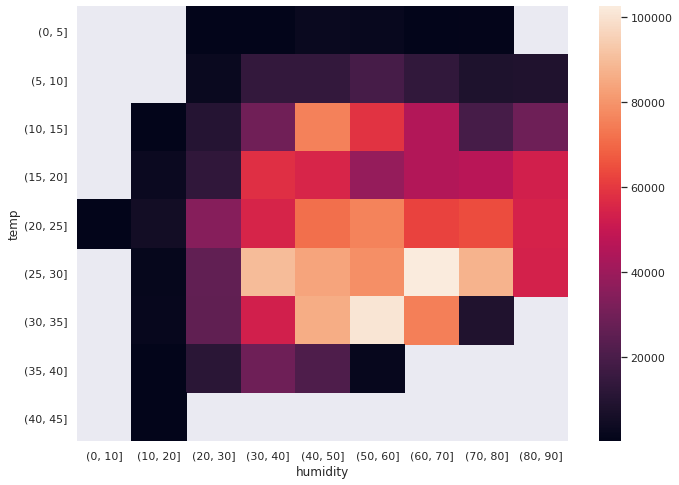

In [23]:
temp_cut = pd.cut(data.temp, range(0, 50, 5))
hum_cut = pd.cut(data.humidity, range(0, 100, 10))
subframe = data.groupby([temp_cut, hum_cut])['count'].sum()
sns.heatmap(subframe.unstack())
plt.yticks(rotation=0)
plt.show()